# Tres tipos de distancia para clustering: Euclidiana, Chevyshev y Manhattan

## Fórmulas y ejemplos simples

![Métricas distancia](./img/metricas_distancia1.png)

![Métricas distancia](./img/metricas_distancia2.png)

![Métricas distancia](./img/metricas_distancia3.png)

![Métricas distancia](./img/metricas_distancia4.png)

![Métricas distancia](./img/metricas_distancia5.png)

![Métricas distancia](./img/metricas_distancia6.png)

![Métricas distancia](./img/metricas_distancia7.png)

![Métricas distancia](./img/metricas_distancia8.png)

## Ejemplo en Python

### Contexto y Datos

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
datos = np.loadtxt("../datos/venta_propiedades.csv", delimiter=",")
datos.shape

(307, 2)

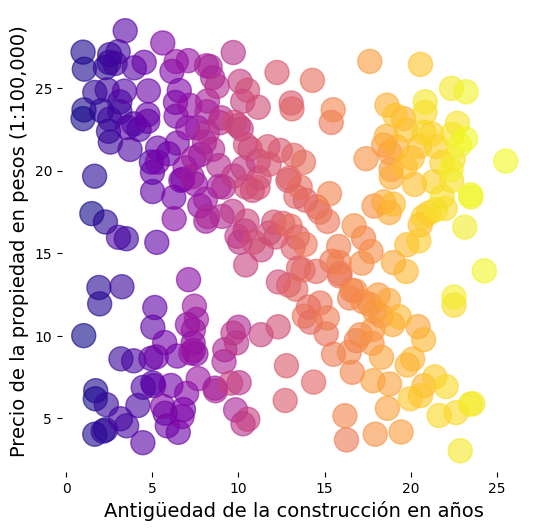

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(datos[:, 0], datos[:, 1], 
           c=np.linspace(0, 1, datos.shape[0]), s=300, alpha=0.6)
plt.xlabel("Antigüedad de la construcción en años", fontsize=14)
plt.ylabel("Precio de la propiedad en pesos (1:100,000)", fontsize=14)
plt.box(False)
plt.show()

### Métricas de distancia entre vecinos

In [15]:
from sklearn.cluster import DBSCAN

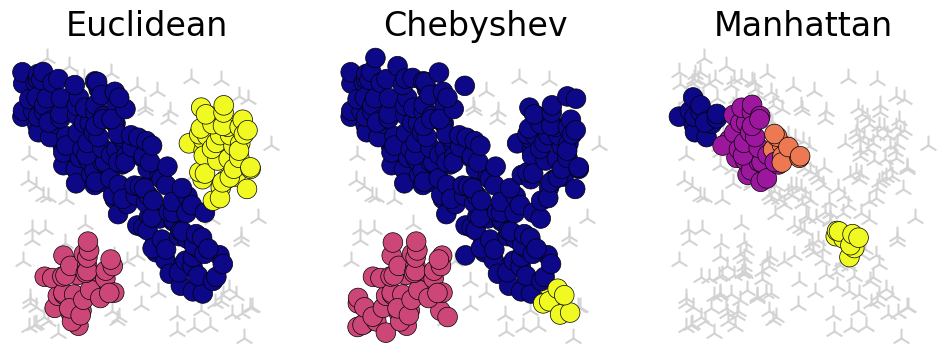

In [16]:
datos = np.loadtxt("../datos/venta_propiedades.csv", delimiter=",")

distancias = ["euclidean", "chebyshev", "manhattan"]

fig = plt.figure(figsize=(12, 4))
plt.set_cmap("plasma")

for d in range(len(distancias)):
    clusters = DBSCAN(eps=2, min_samples=10, metric=distancias[d]).fit_predict(datos)
    ax = fig.add_subplot(1, 3, d+1)
    # Puntos considerados ruido
    ax.scatter(datos[clusters == -1][:, 0], datos[clusters == -1][:, 1],
              c="lightgrey", s=200, marker="2")
    # Puntos pertenecientes a clusters
    ax.scatter(datos[clusters >= 0][:, 0], datos[clusters >= 0][:, 1],
              c=clusters[clusters >= 0], edgecolors="black", s=200, linewidth=0.5)
    ax.set_title(distancias[d].capitalize(), fontsize=24)
    ax.axis("off")

plt.show()